# Remuestreo Bootstrap

Entre los métodos inferenciales que permiten cuantificar el grado de confianza que se puede tener de un estadı́sitico, y saber cuán acertados son los resultados sobre los parámetros de la población, se encuentran las técnias de remuestreo.

Estas técnicas tienen la ventaja de que no necesitan datos distribuidos normalmente, muestras muy grandes y fórmulas complicadas. Además permiten obtener resultados muchas veces más exactos que otros métodos.


El bootstrap es un mecanismo que se centra en el remuestreo de datos dentro de una muestra aleatoria, diseñado para aproximar la precisión de un estimador.


El método se basa en: dada una muestra aleatoria con 'n' observaciones, se construyen con ella 'B' "muestras Bootstrap" del mismo tamaño con reposición (es decir los valores se pueden repeitir).
Para cada una de las B nuevas muestras, se realiza una estimación del parámetro de interés $\theta$.
Luego, se usan los B valores bootstrap estimados para aproximar la distribución del estimador del parámetro.
Esta distribución se utiliza para hacer más inferencias estadísticas, como la estimación del error estándar de $\theta$ o un intervalo de confianza para el mismo.


EL intervalo de confianza que se calcula a partir de los datos de la muestra, es un intervalo en donde se estima que estará cierto valor desconocido, como el parámtero poblacional, con un determinado nivel de confianza.Se denomina nivel de significancia a $\alpha$ y representa la probabilidad de que el intervalo contenga el parámetro poblacional.

En este ejercicio se quiere diseñar una función que por medio del método de boostrap resampling estime la varianza de una V.A. a partir de una muestra de datos. Se toma como 'muestra' a las magnitudes de estrellas pertenecientes a cúmulos globulares los cuales se encuentran en la columna número 6 (contando desde cero) del archivo 'cumulos_globulares.dat'.

Primero para estimar la varianza, se calcula la varianza muestral.


In [1]:
from math import *
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

In [2]:
sns.set()

In [3]:
muestra = np.genfromtxt('cumulos_globulares.dat', usecols=6) #se carga el archivo
muestra = muestra[~np.isnan(muestra)]   #tiene NaNs, así que usa solo los numéricos.
n=len(muestra)  #defino n como el tamaño de la muestra

xm= sum(muestra)/n               #Calculo la media muestral
s2= sum((muestra-xm)**2)/(n-1)   #Calculo varianza muestral
print('Varianza muestral:', s2)

Varianza muestral: 2.225189740761169


A continuación, se realizan remuestreos para aplicar el método de bootstrap y calcular el intervalo de confianza.

Se define la función 'boot' que realiza realiza 'B' muestras nuevas aleatorias del mismo tamaño que la original utilizando la función 'np.random.choice'. Para cada muestra se calcula la varianza muestral y se guardan en una lista.
 
Abajo se grafica la distribución obtenida para la varianza para verla visualmente.

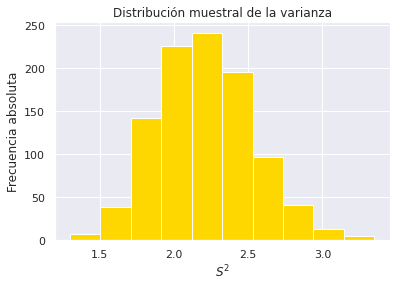

In [4]:
def boot(muestra, n, B=1000):  #defino función con B=cantidad de muestras bootstraps
    var_mues=[]
    for i in range(B):
        muestra_nueva=np.random.choice(muestra, size=n) #genera una muestra aleatoria a partir de un array de tamaño n
        xm= sum(muestra_nueva)/n               #calculo media muestral
        s2= sum((muestra_nueva-xm)**2)/(n-1)   #calculo varianza muestral
        var_mues.append(s2)        
    return var_mues

#Grafico el histograma de las varianzas calculadas
var = boot(muestra, n) # varianzas muestrales de las distintas muestras
plt.hist(var, color='gold')
plt.title('Distribución muestral de la varianza')
plt.xlabel('$S^2$')
plt.ylabel('Frecuencia absoluta')
plt.show()

A continuación, se quiere calcular los intervalos de confidencia del estimador de la varianza con un nivel de significancia $\alpha$ dado. El intervalo de confianza va a estar definido entre los valores $(q_1, q_2)$, tal que el área bajo la curva de la distribución encerrada entre ellos es igual a $\alpha$.

Como en el histograma formado para la varianza se ve que la distribución que se forma es simétrica, se pide que el intervalo de confianza sea simétrico. Por lo tanto, las colas de la distribución (es decir $S^2<q_1$ y $S^2>q_2$), van a tener un área bajo la curva de valor $\frac{1-\alpha}{2}$ cada una.
Luego, se buscan los valores de $q_1$ y $q_2$ que cumplan con lo siguiente:

$$\frac{N(S^2<q_1)}{B}=\frac{1-\alpha}{2}$$

$$\frac{N(S^2>q_2)}{B}=\frac{1-\alpha}{2}$$

donde N() indica el número de valores de $S^2$ que cumplen esa codición.

Programa para calcular q1:

In [5]:
def IC_q1(var, a):   #a es alpha 
    var.sort()       #ordeno los valores de menor a mayor
    suma=0
    y=(1-a)/2        #condición que quiero que se cumpla
    for i in range(len(var)):
        x=var[i]     #defino como x el elemento i de la varianza
        suma=suma+x  #los sumo
        t=suma/(len(var))  #divido por la cantidad de muestras
        if t<= y:
            None
        else:
            q1=x
            break
    return q1

Programa para calcular q2:

In [6]:
def IC_q2(var, a): 
    var.sort(reverse=True) #ordeno los valores de mayor a menor
    suma=0
    y=(1-a)/2    
    for i in range(len(var)):
        x=var[i]     
        suma=suma+x  
        t=suma/(len(var))  
        if t<= y:
            None
        else:
            q2=x
            break
    return q2

Como ejemplo, se toma el valor de $\alpha$=0.95 y 0.9 para computar el valor final obtenido para la varianza con su intervalo de confianza.

In [7]:
q1=IC_q1(var, a=0.95)
print('Valor de q1=', q1)

q2=IC_q2(var, a=0.95)
print('Valor de q2=', q2)

print('El valor que se obtiene para la varianza es ', s2, 'con un intervalo de confianza de (', q1, ',', q2,').')

Valor de q1= 1.5683505561684126
Valor de q2= 2.981743348961207
El valor que se obtiene para la varianza es  2.225189740761169 con un intervalo de confianza de ( 1.5683505561684126 , 2.981743348961207 ).


In [8]:
q1=IC_q1(var, a=0.9)
print('Valor de q1=', q1)

q2=IC_q2(var, a=0.9)
print('Valor de q2=', q2)

print('El valor que se obtiene para la varianza es ', s2, 'con un intervalo de confianza de (', q1, ',', q2,').')

Valor de q1= 1.6623962998712989
Valor de q2= 2.938861900165473
El valor que se obtiene para la varianza es  2.225189740761169 con un intervalo de confianza de ( 1.6623962998712989 , 2.938861900165473 ).


## Conclusiones

Por medio del método de remuestreo bootstrap se puede conocer la varianza de una variable aleatoria y una estimación de su incerteza de la cual no se tiene conocimiento sobre su distribución. Además se puede calcular un intervalo de confianza para un determinado valor de $\alpha$ mediante el calculo de los límites inferiores y superiores del intervalo.

Se puede ver que la distribución de la varianza tiene forma de campana centrada en el valor estimado de la varianza muestral, por lo que el intervalo de confianza es simétrico.

También se ve, con los últimos ejemplos que si el valor de $\alpha$ decrece, el IC también.
